In [97]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [98]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("/Users/matthew941/Desktop/KORE208_team5/3. ·Ñå·Ö•·Üº·Ñé·Öµ·Ñã·Öµ·Ü´·Ñá·Öß·ÜØ ·Ñá·Öµ·Ü´·ÑÉ·Ö©, ·Ñã·ÖØ·ÑÉ·Ö≥·Ñã·Öµ·Ü∑·Ñá·Ö¶·ÑÉ·Öµ·Üº/2.·ÑÄ·Öµ·Ü∑·ÑÜ·ÖÆ·Ü´·Ñâ·ÖÆ/kim_moonsu_tagged_filtered.csv")

In [99]:
import re

tokenized_sentences = [
    [token for token in sentence.split() if token.split("(")[0].lower() != "vs"]
    for sentence in df['tagged'].dropna()
]

In [100]:
from gensim.models import Word2Vec

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÎêú Î¨∏Ïû•ÏóêÏÑú Îã®Ïñ¥Îßå Ï∂îÏ∂ú (ex: 'ÎùºÎîîÏò§(NNG)' ‚Üí 'ÎùºÎîîÏò§') + 'vs' ÏÇ≠Ï†ú
sentences = df['tagged'].dropna().tolist()

# Ï†úÏô∏ÌïòÍ≥† Ïã∂ÏùÄ Îã®Ïñ¥
ban_words = {"vs", "ÏòÄÍ≥†", "D", "Ïù¥", "ÏóøÏÉà", "Î≥¥Î¶Ñ", "Ïó¥Ìùò", "Ïó∞Ïù¥ÌãÄ", "Îâ¥ÏãúÏä§",'ÍπÄ','ÌõÑÎ≥¥',"Í∏∞ÏûêÍπÄÏßÄÌò∏","Îâ¥Ïä§Î∑∞Î¶¨Ìïë","7","6","8","ÏãúÏóî"}
ban_tags = {"VCP", "SL"}

# ÌïÑÌÑ∞ÎßÅ
tokenized_sentences = [
    [
        token.split('(')[0]
        for token in sentence.split()
        if token.split('(')[0].lower() not in ban_words and token.split('(')[-1][:-1] not in ban_tags
    ]
    for sentence in sentences
]


# Word2Vec ÌïôÏäµ (Skip-gram, sg=1)
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=1,
    workers=4,
    seed=42
)

# Word2VecÏóê Ïã§Ï†ú Îì§Ïñ¥Í∞Ñ Îã®Ïñ¥Îßå Í∏∞Ï§ÄÏúºÎ°ú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
word_to_tag = {}

for sentence in df['tagged'].dropna():
    for token in sentence.split():
        if "(" in token and ")" in token:
            word, tag = token.rsplit("(", 1)
            tag = tag.rstrip(")")
            # Îã®Ïñ¥Í∞Ä Word2Vec ÌïôÏäµÏóê Ïã§Ï†ú Ìè¨Ìï®Îêú Í≤ΩÏö∞Îßå
            if word in model.wv and word not in word_to_tag:
                word_to_tag[word] = tag



# ÍπÄÎ¨∏ÏàòÏôÄ Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ 50Í∞ú Ï∂îÏ∂ú

keyword = 'ÍπÄÎ¨∏Ïàò'

if keyword in model.wv:
    similar_words = model.wv.most_similar(keyword, topn=50)
    print(f"\n[{keyword}]Í≥º Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ (ÌíàÏÇ¨ Ìè¨Ìï®):")
    for word, sim in similar_words:
        tag = word_to_tag.get(word, "UNKNOWN")  # ÌíàÏÇ¨ ÏóÜÏúºÎ©¥ 'UNKNOWN'ÏúºÎ°ú Ï∂úÎ†•
        print(f"  {word} ({tag}) - {sim:.3f}")
else:
    print(f"'{keyword}' Îã®Ïñ¥Í∞Ä Word2Vec vocabularyÏóê ÏóÜÏäµÎãàÎã§.")


[ÍπÄÎ¨∏Ïàò]Í≥º Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ (ÌíàÏÇ¨ Ìè¨Ìï®):
  ÍπÄÎèôÏó∞ (NNP) - 0.610
  ÏúºÎä•Ï†ïÏù¥Í±∞Î¶¨ (NNP) - 0.606
  Íµ≠ÎØºÏùòÌûò (NNP) - 0.597
  ÌïòÏö∞Ïä§ (NNP) - 0.596
  ÌòπÌèâ (NNG) - 0.593
  Ï∂îÏ≤® (NNG) - 0.593
  ÏÇºÏûê (NNG) - 0.593
  ÏàòÎπÑ (NNG) - 0.589
  Îì§Îú® (VV) - 0.587
  ÍπÄÏû¨Ïó∞ (NNP) - 0.585
  Ìò∏Ïùò (NNG) - 0.583
  ÎçîÎ∏î (NNG) - 0.583
  Ïä§ÏΩîÏñ¥ (NNG) - 0.579
  Í¥ÄÏ†Ñ (NNG) - 0.575
  Í∏âÏÜçÌûà (MAG) - 0.575
  ÌåΩÌåΩ (XR) - 0.575
  Í∏∞ÏÅò (VA) - 0.575
  ÍπÄÌù•Íµ≠ (NNP) - 0.574
  ÌååÏ†Ñ (NNG) - 0.573
  Ï¥ùÏßëÍ≤∞ (NNG) - 0.572
  Ïª®ÌçºÎü∞Ïä§ (NNG) - 0.572
  Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú (NNP) - 0.571
  Ï†úÏ£ºÏãú (NNP) - 0.571
  ÏòÅÏ≤úÏó≠ (NNP) - 0.571
  Í∞úÎπÑ (NNG) - 0.571
  Ï¥ùÌï© (NNG) - 0.569
  Ïã†Î¶º (NNP) - 0.569
  Ê∞ë (SH) - 0.568
  Ïù¥Ïñ¥ÏÑú (MAG) - 0.568
  Ïä§Ïúô (NNG) - 0.567
  Ï∫°Ï≥ê (NNP) - 0.567
  ÎØ∏ÎîîÏñ¥Îç∞Ïù¥ (NNG) - 0.566
  ÎåÄÏÑ† (NNG) - 0.566
  Í≤∞Ïû• (NNG) - 0.565
  Ï†ïÎ©¥Ï∂©Îèå (NNG) - 0.565
  Í±∞Î®∏Ï•ê (VV) - 0.564
  Ìå®Ïã± (NNP) - 0.564
  Èô¢Â§ñ (SH) - 0.563
  Ïò

zsh:1: command not found: pip
zsh:1: command not found: pip


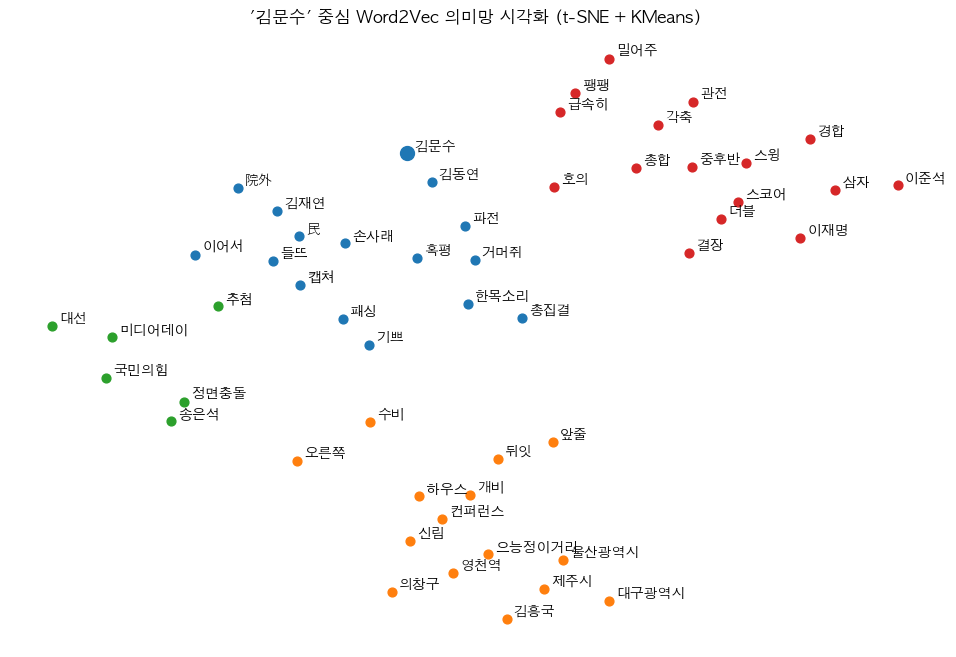

In [101]:
# 2D

import numpy as np

!pip install scikit-learn
!pip install matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# Ìè∞Ìä∏ ÏßÄÏ†ï
# mpl.rcParams['font.family'] = 'Malgun Gothic'
# mpl.rcParams['axes.unicode_minus'] = False


# macOSÏù∏ Í≤ΩÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]

# ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
must_include = ['Ïù¥Ïû¨Î™Ö', 'Ïù¥Ï§ÄÏÑù']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNE Ï∞®Ïõê Ï∂ïÏÜå (‚òÖ n_iter Ï†úÍ±∞Ìï®!)
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    plt.scatter(x, y, c=f"C{labels[i]}", s=100 if word == keyword else 40)
    plt.text(x + 0.5, y + 0.5, word, fontsize=10)
plt.title(f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)")
plt.axis('off')
plt.show()

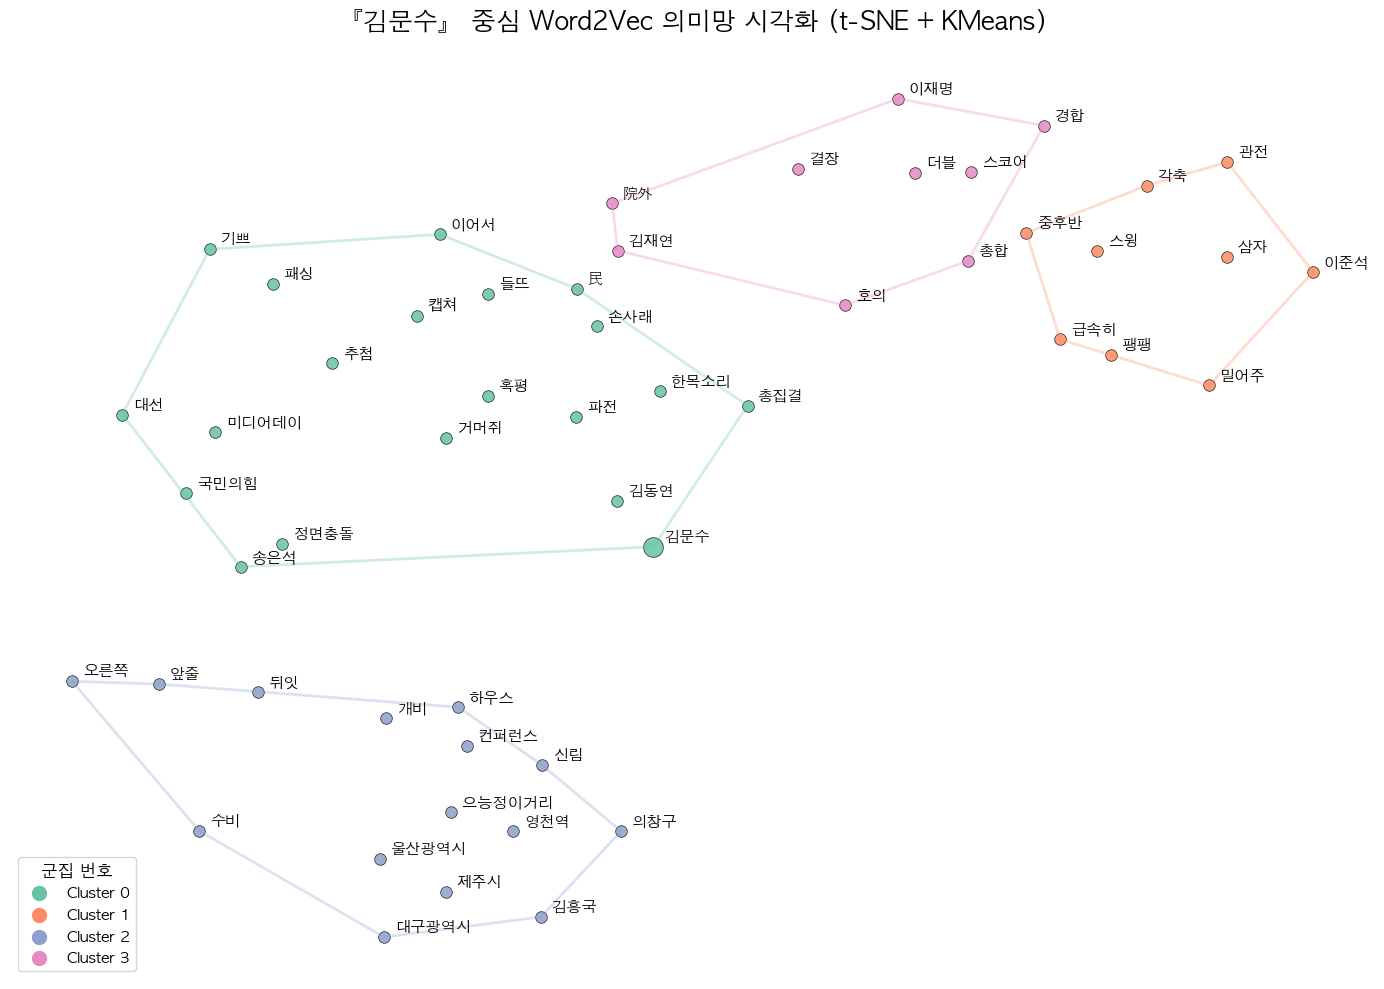

In [108]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import seaborn as sns
import platform

# Ï§ëÏã¨ Îã®Ïñ¥ ÏÑ§Ï†ï
keyword = 'ÍπÄÎ¨∏Ïàò'

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú (Î™ÖÏÇ¨ Ïó¨Î∂Ä Î¨¥ÏãúÌïòÍ≥† top50)
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]

# ÌïÑÏàò Îã®Ïñ¥ Ï∂îÍ∞Ä
must_include = ['Ïù¥Ï§ÄÏÑù', 'Ïù¥Ïû¨Î™Ö']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# Ï∞®Ïõê Ï∂ïÏÜå
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏
palette = sns.color_palette("Set2", n_colors=4)

# ÏãúÍ∞ÅÌôî ÏãúÏûë
plt.figure(figsize=(14, 10))
plt.title(f"„Äé{keyword}„Äè Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)", fontsize=18, weight='bold', pad=20)

# Convex HullÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòÅÏó≠ Í∑∏Î¶¨Í∏∞
for label in np.unique(labels):
    cluster_points = vec_2d[labels == label]
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_vertices = np.append(hull.vertices, hull.vertices[0])  # Í≤ΩÍ≥ÑÏÑ† Îã´Í∏∞
        plt.plot(cluster_points[hull_vertices, 0], cluster_points[hull_vertices, 1],
                 linestyle='-', linewidth=2, color=palette[label], alpha=0.3)

# ÎÖ∏Îìú Î∞è Îã®Ïñ¥ Ï∂úÎ†•
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    size = 200 if word == keyword else 70
    weight = 'bold' if word == keyword else 'normal'
    label_color = palette[labels[i]]
    plt.scatter(x, y, c=[label_color], s=size, alpha=0.85, edgecolors='k', linewidths=0.5)
    plt.text(x + 0.4, y + 0.4, word, fontsize=11, weight=weight)

plt.axis('off')
for label in np.unique(labels):
    plt.scatter([], [], c=[palette[label]], label=f'Cluster {label}', s=100)

# Î≤îÎ°Ä ÏúÑÏπò ÏôºÏ™Ω ÌïòÎã®ÏúºÎ°ú Ïù¥Îèô
plt.legend(title="Íµ∞Ïßë Î≤àÌò∏", loc='lower left', fontsize=11, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()


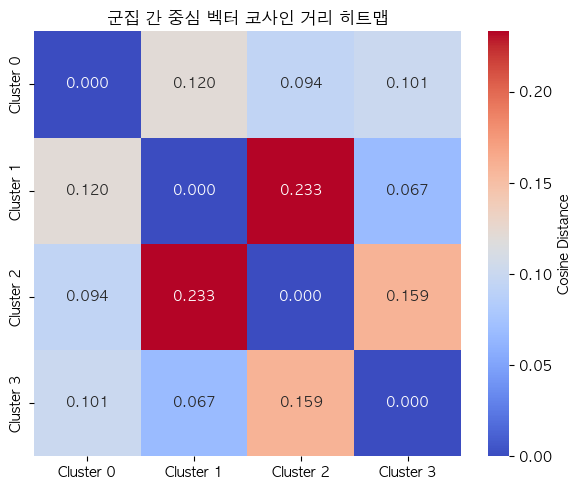

In [109]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Íµ∞ÏßëÎ≥Ñ Î≤°ÌÑ∞ Î∂ÑÎ¶¨
cluster_vectors = {}
for cluster_id in range(4):
    idxs = np.where(labels == cluster_id)[0]
    cluster_vectors[cluster_id] = word_vectors[idxs]

# Íµ∞Ïßë Ï§ëÏã¨ Î≤°ÌÑ∞ Í≥ÑÏÇ∞
cluster_centroids = {
    cluster_id: np.mean(vectors, axis=0)
    for cluster_id, vectors in cluster_vectors.items()
}

# ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨ Í≥ÑÏÇ∞
centroid_matrix = np.array([cluster_centroids[i] for i in range(4)])
cosine_distance_matrix = cosine_distances(centroid_matrix)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
df_dist = pd.DataFrame(cosine_distance_matrix, 
                       index=[f'Cluster {i}' for i in range(4)], 
                       columns=[f'Cluster {i}' for i in range(4)])

plt.figure(figsize=(6, 5))
sns.heatmap(df_dist, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={"label": "Cosine Distance"})
plt.title("Íµ∞Ïßë Í∞Ñ Ï§ëÏã¨ Î≤°ÌÑ∞ ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨ ÌûàÌä∏Îßµ")
plt.tight_layout()
plt.show()

In [110]:
from itertools import combinations
from scipy.spatial.distance import cosine
import numpy as np

def semantic_cohesiveness(model, keyword, topn=20):
    # Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∂îÏ∂ú
    similar_words = [word for word, _ in model.wv.most_similar(keyword, topn=topn)]
    
    # Î≤°ÌÑ∞ Ï∂îÏ∂ú
    vectors = [model.wv[word] for word in similar_words]

    # Îã®Ïñ¥Ïåç ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨ ÌèâÍ∑†
    word_pairs = list(combinations(range(len(vectors)), 2))
    distances = [cosine(vectors[i], vectors[j]) for i, j in word_pairs]

    avg_distance = np.mean(distances)
    print(f"„Äé{keyword}„ÄèÏùò ÏùòÎØ∏ Í≤∞ÏÜçÎ†• (20Í∞ú Ïú†ÏÇ¨Ïñ¥ Í∞Ñ ÌèâÍ∑† ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨): {avg_distance:.4f}")
    return avg_distance

# ÏòàÏãú Ïã§Ìñâ
semantic_cohesiveness(model, keyword='Ïù¥Ï§ÄÏÑù', topn=20)
semantic_cohesiveness(model, keyword='Ïù¥Ïû¨Î™Ö', topn=20)
semantic_cohesiveness(model, keyword='ÍπÄÎ¨∏Ïàò', topn=20)


„ÄéÏù¥Ï§ÄÏÑù„ÄèÏùò ÏùòÎØ∏ Í≤∞ÏÜçÎ†• (20Í∞ú Ïú†ÏÇ¨Ïñ¥ Í∞Ñ ÌèâÍ∑† ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨): 0.2324
„ÄéÏù¥Ïû¨Î™Ö„ÄèÏùò ÏùòÎØ∏ Í≤∞ÏÜçÎ†• (20Í∞ú Ïú†ÏÇ¨Ïñ¥ Í∞Ñ ÌèâÍ∑† ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨): 0.2586
„ÄéÍπÄÎ¨∏Ïàò„ÄèÏùò ÏùòÎØ∏ Í≤∞ÏÜçÎ†• (20Í∞ú Ïú†ÏÇ¨Ïñ¥ Í∞Ñ ÌèâÍ∑† ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨): 0.2285


0.22845427719102196

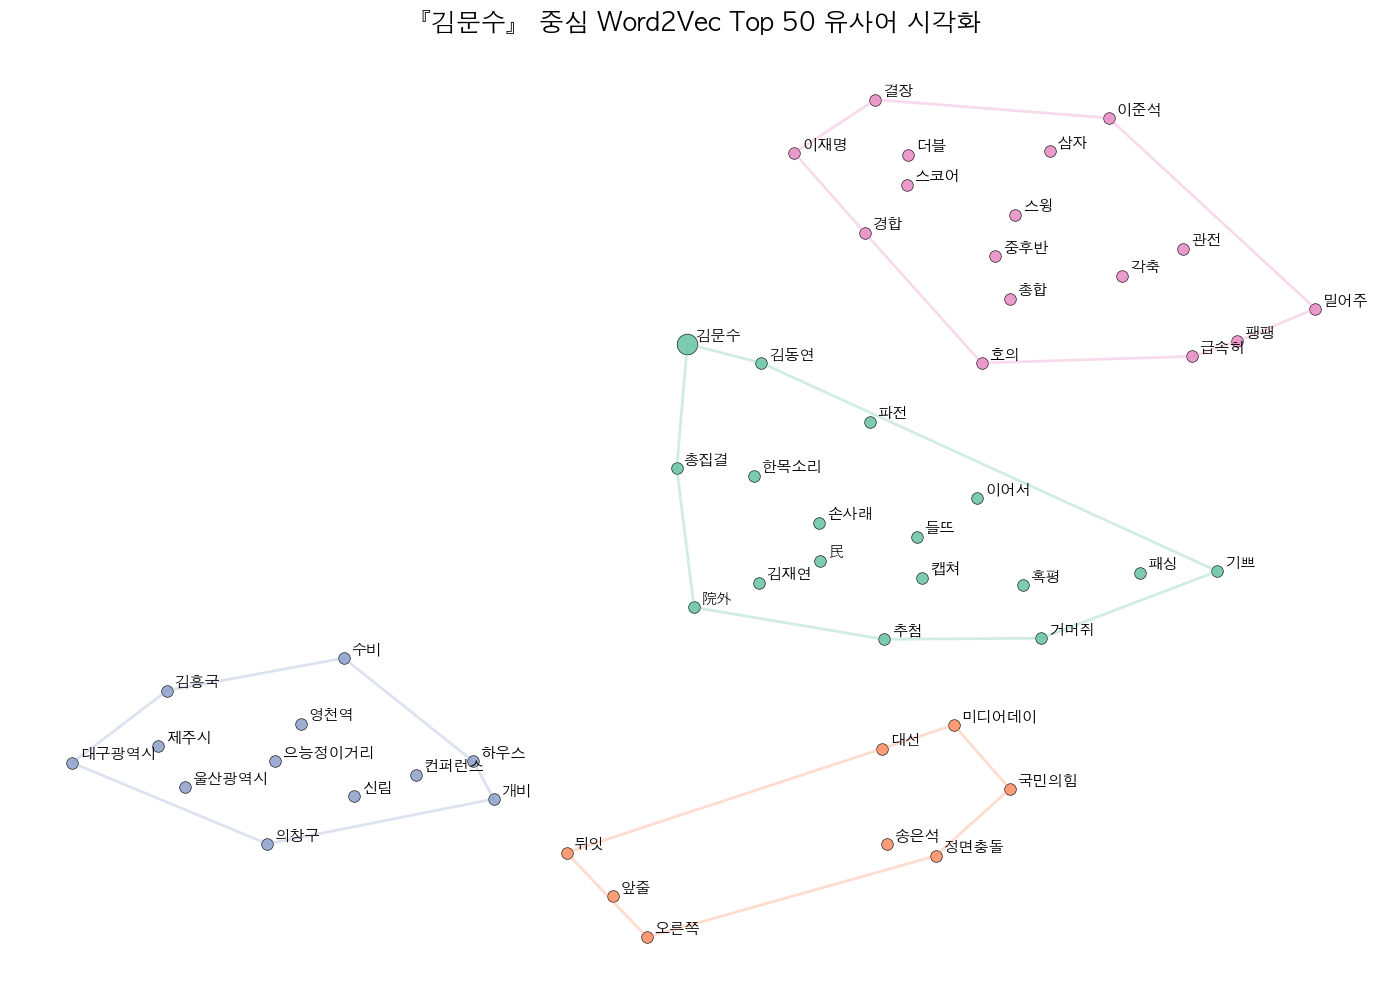

In [103]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import seaborn as sns
import platform

# Ï§ëÏã¨ Îã®Ïñ¥ ÏÑ§Ï†ï
keyword = "ÍπÄÎ¨∏Ïàò"  # ÏòàÏãú, ÌïÑÏöîÏãú Î≥ÄÍ≤Ω

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Word2Vec Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú + ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]
must_include = ['Ïù¥Ï§ÄÏÑù', 'Ïù¥Ïû¨Î™Ö']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNEÎ°ú Ï∞®Ïõê Ï∂ïÏÜå
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏
palette = sns.color_palette("Set2", n_colors=4)

# ÏãúÍ∞ÅÌôî ÏãúÏûë
plt.figure(figsize=(14, 10))
plt.title(f"„Äé{keyword}„Äè Ï§ëÏã¨ Word2Vec Top 50 Ïú†ÏÇ¨Ïñ¥ ÏãúÍ∞ÅÌôî", fontsize=18, weight='bold', pad=20)

# Convex HullÎ°ú Íµ∞Ïßë ÏòÅÏó≠ ÏãúÍ∞ÅÌôî
for label in np.unique(labels):
    cluster_points = vec_2d[labels == label]
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_vertices = np.append(hull.vertices, hull.vertices[0])
        plt.plot(cluster_points[hull_vertices, 0], cluster_points[hull_vertices, 1],
                 linestyle='-', linewidth=2, color=palette[label], alpha=0.3)

# ÎÖ∏Îìú Î∞è Î†àÏù¥Î∏î ÌëúÏãú
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    size = 220 if word == keyword else 70
    weight = 'bold' if word == keyword else 'normal'
    color = palette[labels[i]]
    plt.scatter(x, y, c=[color], s=size, alpha=0.85, edgecolors='k', linewidths=0.5)
    plt.text(x + 0.4, y + 0.4, word, fontsize=11, weight=weight)

plt.axis('off')
plt.tight_layout()
plt.show()

zsh:1: command not found: pip
zsh:1: command not found: pip


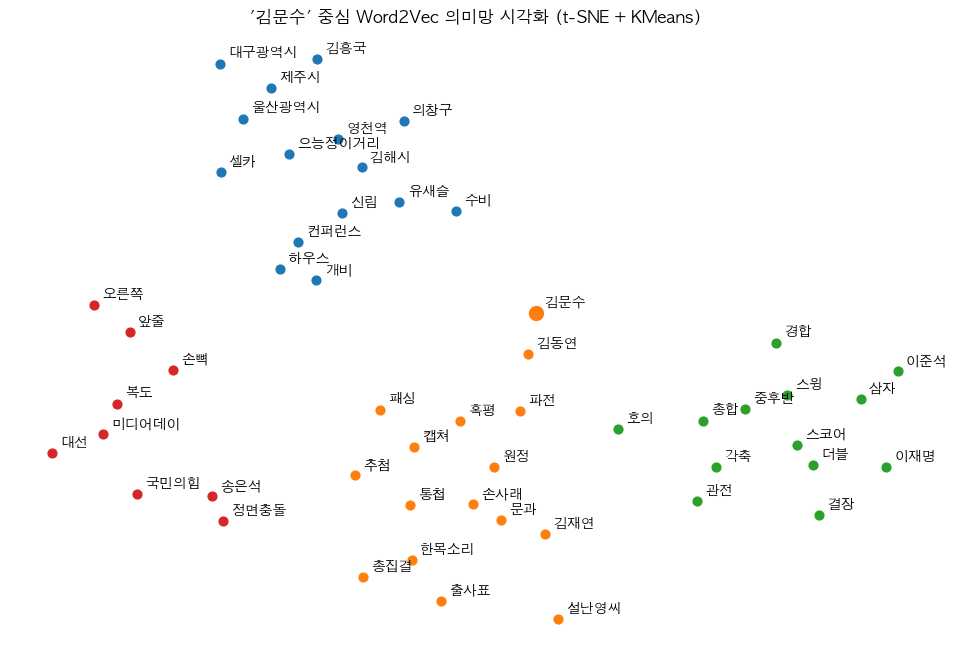

In [104]:
# 2D + Î™ÖÏÇ¨Îßå

import numpy as np

!pip install scikit-learn
!pip install matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# Ìè∞Ìä∏ ÏßÄÏ†ï
# mpl.rcParams['font.family'] = 'Malgun Gothic'
# mpl.rcParams['axes.unicode_minus'] = False

# macOSÏù∏ Í≤ΩÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú
all_similar = model.wv.most_similar(keyword, topn=500)  # ÎÑâÎÑâÌïòÍ≤å ÎΩëÍ∏∞
noun_similar = [word for word, sim in all_similar if word_to_tag.get(word, "").startswith("NN")]

# ÏµúÏ¢Ö Ïú†ÏÇ¨ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏: Ï§ëÏã¨ Îã®Ïñ¥ + Î™ÖÏÇ¨ 50Í∞ú
similar_words = [keyword] + noun_similar[:50]

# ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
must_include = ['Ïù¥Ïû¨Î™Ö', 'Ïù¥Ï§ÄÏÑù']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNE Ï∞®Ïõê Ï∂ïÏÜå (‚òÖ n_iter Ï†úÍ±∞Ìï®!)
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)


# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))

for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    tag = word_to_tag.get(word, "UNK")

    plt.scatter(x, y, c=f"C{labels[i]}", s=100 if word == keyword else 40)
    plt.text(x + 0.5, y + 0.5, f"{word}", fontsize=10)

plt.title(f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)")
plt.axis('off')
plt.show()

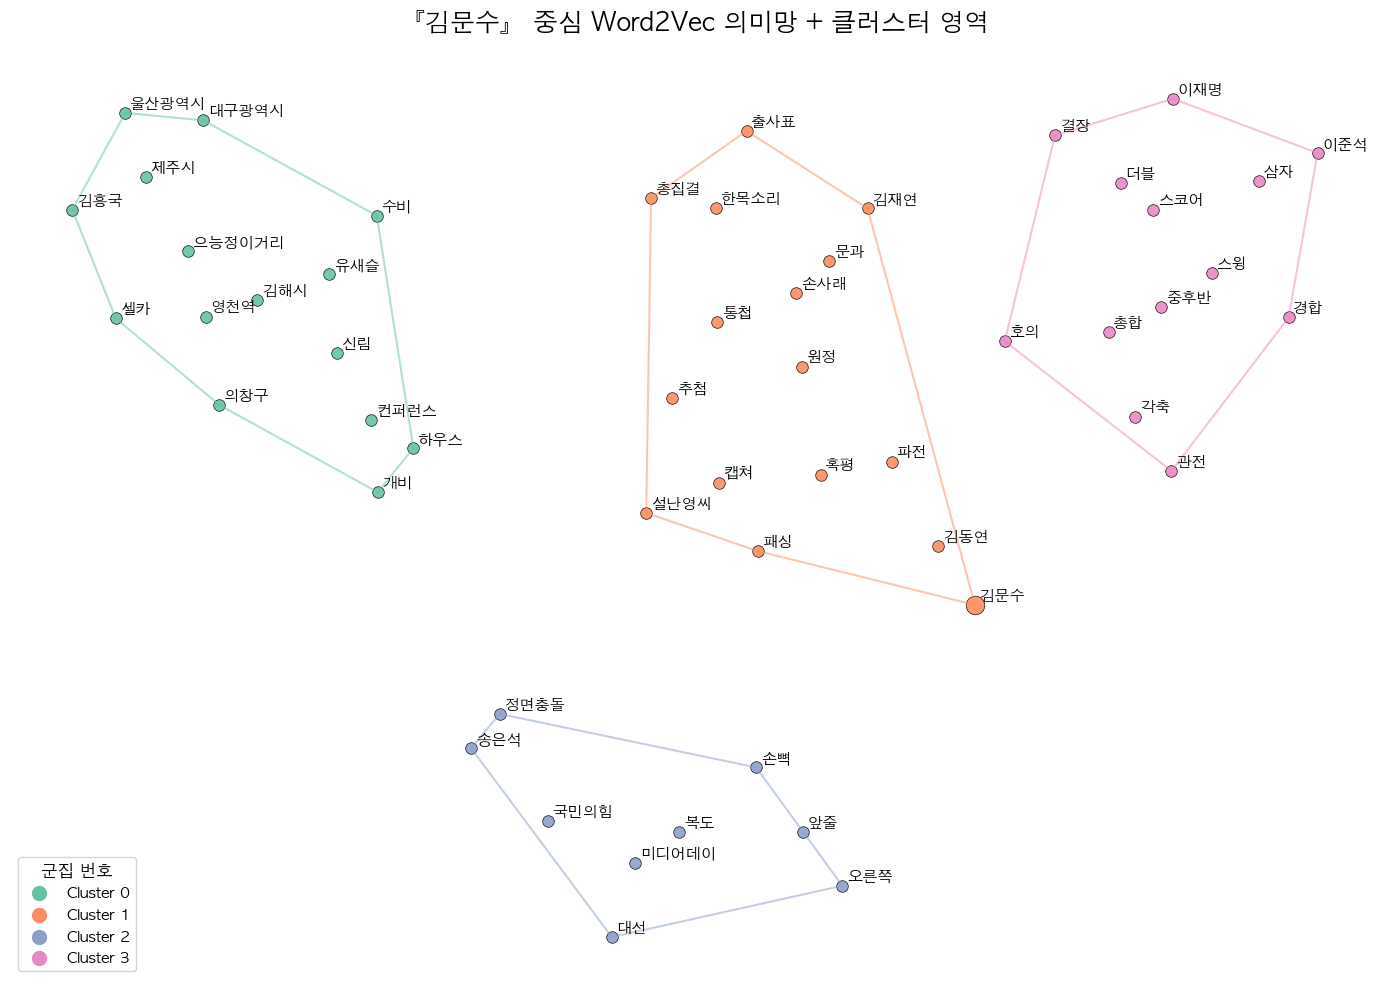

In [105]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import ConvexHull
import platform
import seaborn as sns

# Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Ïú†ÏÇ¨ Îã®Ïñ¥ ÎΩëÍ∏∞
all_similar = model.wv.most_similar(keyword, topn=500)
noun_similar = [word for word, sim in all_similar if word_to_tag.get(word, "").startswith("NN")]
similar_words = [keyword] + noun_similar[:50]
must_include = ['Ïù¥Ï§ÄÏÑù', 'Ïù¥Ïû¨Î™Ö']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# Ï∞®Ïõê Ï∂ïÏÜå (t-SNE)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏
palette = sns.color_palette("Set2", n_colors=4)

# ÏãúÍ∞ÅÌôî ÏãúÏûë
plt.figure(figsize=(14, 10))
plt.title(f"„Äé{keyword}„Äè Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù + ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòÅÏó≠", fontsize=18, weight='bold', pad=20)

# Íµ∞ÏßëÎ≥Ñ Convex Hull Í∑∏Î¶¨Í∏∞
for label in np.unique(labels):
    points = vec_2d[labels == label]
    if len(points) >= 3:  # ConvexHullÏùÄ ÏµúÏÜå 3Ï†ê ÌïÑÏöî
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], linestyle='-', color=palette[label], alpha=0.5)

# Îã®Ïñ¥ + Ï†ê Ï∞çÍ∏∞
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    size = 180 if word == keyword else 70
    weight = 'bold' if word == keyword else 'normal'
    plt.scatter(x, y, c=[palette[labels[i]]], s=size, alpha=0.9, edgecolors='k', linewidths=0.5)
    plt.text(x + 0.3, y + 0.3, word, fontsize=11, weight=weight)

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.box(False)
for label in np.unique(labels):
    plt.scatter([], [], c=[palette[label]], label=f'Cluster {label}', s=100)

# Î≤îÎ°Ä ÏúÑÏπò ÏôºÏ™Ω ÌïòÎã®ÏúºÎ°ú Ïù¥Îèô
plt.legend(title="Íµ∞Ïßë Î≤àÌò∏", loc='lower left', fontsize=11, title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

In [106]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [107]:
# 3D

import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.io as pio

# üîß Î∏åÎùºÏö∞Ï†ÄÎ°ú Ï∂úÎ†•ÎêòÎèÑÎ°ù ÏÑ§Ï†ï
pio.renderers.default = "browser"

# 1. Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∂îÏ∂ú
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]
word_vectors = np.array([model.wv[word] for word in similar_words])

# 2. 3Ï∞®Ïõê t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
vec_3d = tsne.fit_transform(word_vectors)

# 3. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_3d)

# 4. Plotly ÏãúÍ∞ÅÌôî
fig = go.Figure()

for i in range(4):
    idx = [j for j, label in enumerate(labels) if label == i]
    fig.add_trace(go.Scatter3d(
        x=vec_3d[idx, 0],
        y=vec_3d[idx, 1],
        z=vec_3d[idx, 2],
        mode='markers+text',
        marker=dict(size=[10 if similar_words[j] == keyword else 5 for j in idx]),
        text=[similar_words[j] for j in idx],
        name=f'Cluster {i+1}',
        textposition='top center'
    ))

fig.update_layout(
    title=f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (3D t-SNE + KMeans)",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()